In [1]:
import pylab as pl
import pandas as pd
from jqdata import finance

In [2]:
code='161005'
df = finance.run_query(query(finance.FUND_MAIN_INFO).filter(finance.FUND_MAIN_INFO.main_code==code).limit(1))
df

,id,main_code,name,advisor,trustee,operate_mode_id,operate_mode,underlying_asset_type_id,underlying_asset_type,start_date,end_date
0,2227,161005,富国天惠成长混合(LOF),富国基金管理有限公司,中国工商银行股份有限公司,401006,LOF,402004,混合型,2005-11-16,None


In [3]:
fund_name = df['name'][0]
fund_mode = df['operate_mode'][0]
fund_type = df['underlying_asset_type'][0]
print(fund_name, fund_mode, fund_type)

富国天惠成长混合(LOF) LOF 混合型


In [4]:
df2 = finance.run_query(query(finance.FUND_PORTFOLIO.period_end,
                        finance.FUND_PORTFOLIO.stock_rate,
                        finance.FUND_PORTFOLIO.fixed_income_rate,
                        finance.FUND_PORTFOLIO.deposit_rate,).filter(finance.FUND_PORTFOLIO.code==code).limit(100))

In [5]:
df2.rename(columns={'stock_rate':'股票',
                    'fixed_income_rate':'固收债券',
                    'deposit_rate':'现金',
                    'period_end': '报告期'
                   },inplace=True) 
df2.set_index('报告期', inplace=True)
df2.head()

,股票,固收债券,现金
报告期,,,
2006-03-31,80.17,4.22,14.41
2006-06-30,90.07,6.79,2.36
2006-09-30,90.10,5.47,1.79
2006-12-31,82.76,3.04,9.21
2007-03-31,93.05,3.59,1.88


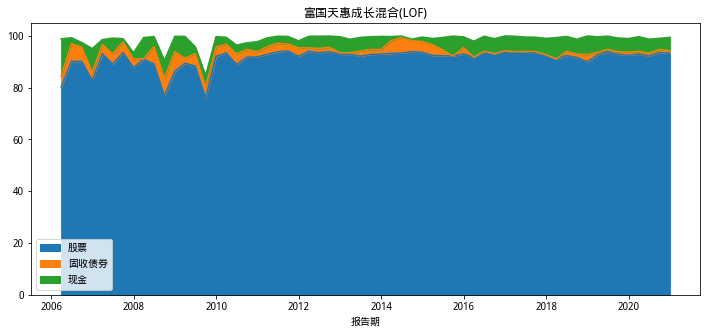

In [6]:
df2.plot.area(figsize=(12,5),title=fund_name)

In [7]:
# 股票持仓
types = ('第一季度','第二季度','第三季度','第四季度')
q=query(finance.FUND_PORTFOLIO_STOCK) \
    .filter(finance.FUND_PORTFOLIO_STOCK.code==code) \
    .filter(finance.FUND_PORTFOLIO_STOCK.rank<=10) \
    .filter(finance.FUND_PORTFOLIO_STOCK.report_type.in_(types)) \
    .order_by(finance.FUND_PORTFOLIO_STOCK.pub_date.desc()).limit(2000)
df3=finance.run_query(q)

In [8]:
df3.head()

,id,code,period_start,period_end,pub_date,report_type_id,report_type,rank,symbol,name,shares,market_cap,proportion
0,16183519,161005,2020-10-01,2020-12-31,2021-01-22,403004,第四季度,4,002352,顺丰控股,13000000.0,1.146990e+09,3.74
1,16183516,161005,2020-10-01,2020-12-31,2021-01-22,403004,第四季度,1,300122,智飞生物,11000000.0,1.613054e+09,5.26
2,16183517,161005,2020-10-01,2020-12-31,2021-01-22,403004,第四季度,2,600887,伊利股份,28870276.0,1.280974e+09,4.18
3,16183518,161005,2020-10-01,2020-12-31,2021-01-22,403004,第四季度,3,600519,贵州茅台,581992.0,1.162820e+09,3.79
4,16183520,161005,2020-10-01,2020-12-31,2021-01-22,403004,第四季度,5,601318,中国平安,13000000.0,1.130740e+09,3.69


In [9]:
# 保存
#df3.to_csv(str(code)+'_stock.csv')

In [10]:
def my_industry(x):
    code = normalize_code([x['symbol']])[0]
    industry = get_industry(security=[code], date=x['period_end'])
    if 'jq_l1' in industry[code]:
        return industry[code]['jq_l1']['industry_name']
    return '其它'

In [11]:
df3['industry'] = df3.apply(my_industry, axis=1)
df3[['symbol','name','industry']].head()

,symbol,name,industry
0,002352,顺丰控股,工业指数
1,300122,智飞生物,医疗保健指数
2,600887,伊利股份,日常消费指数
3,600519,贵州茅台,日常消费指数
4,601318,中国平安,金融指数


In [12]:
df3.rename(columns={'period_end':'报告期','industry':'行业', 'proportion':'仓位'},inplace=True) 

In [13]:
g=df3[['报告期','行业','仓位']].groupby(['报告期','行业'])

In [14]:
df4 = g['仓位'].sum().unstack().fillna(0)
df4.head()

行业,信息技术指数,医疗保健指数,可选消费指数,工业指数,房地产指数,日常消费指数,材料指数,电信服务指数,金融指数
报告期,,,,,,,,,
2006-03-31,0.00,0.00,12.62,13.25,0.0,13.30,0.00,0.0,7.76
2006-06-30,0.00,0.00,7.10,13.67,0.0,15.50,0.00,0.0,8.32
2006-09-30,4.75,0.00,11.59,0.00,0.0,19.64,0.00,0.0,18.37
2006-12-31,9.53,6.22,9.28,0.00,0.0,19.93,8.74,0.0,9.45
2007-03-31,5.02,0.00,9.41,5.33,0.0,9.65,10.15,0.0,19.08


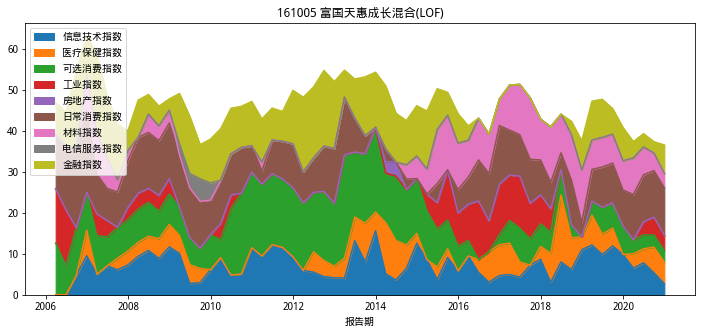

In [15]:
df4.plot.area(figsize=(12,5),title=code + ' ' +fund_name)
pl.legend(loc='upper left')

In [16]:
df = get_security_info('399372.XSHE')
print(df)

Security(code=399372.XSHE)


In [17]:
df.display_name 

'大盘成长'

In [18]:
from datetime import datetime, timedelta
start_date = datetime.now()-timedelta(days=365*3)
end_date = datetime.now()

In [19]:
df  = get_price(['399372.XSHE','399373.XSHE','399374.XSHE','399375.XSHE','399376.XSHE','399377.XSHE'], 
               start_date = start_date, 
               end_date = end_date, 
               frequency='daily',
               fields=['close'], 
               skip_paused=False,
               fq='pre',panel=False)

In [20]:
df.head()

,time,code,close
0,2018-03-14,399372.XSHE,4150.25
1,2018-03-15,399372.XSHE,4173.40
2,2018-03-16,399372.XSHE,4109.44
3,2018-03-19,399372.XSHE,4105.58
4,2018-03-20,399372.XSHE,4101.73


In [21]:
g=df.groupby(['time','code'])
df2 = g['close'].sum().unstack().fillna(method='pad',axis=0)
df2.head()

code,399372.XSHE,399373.XSHE,399374.XSHE,399375.XSHE,399376.XSHE,399377.XSHE
time,,,,,,
2018-03-14,4150.25,7786.67,4543.48,5988.55,5788.77,6611.67
2018-03-15,4173.40,7833.86,4556.21,5977.18,5770.86,6579.55
2018-03-16,4109.44,7771.86,4517.10,5953.52,5743.06,6552.00
2018-03-19,4105.58,7807.09,4548.50,5917.96,5754.16,6507.90
2018-03-20,4101.73,7822.24,4572.77,5933.38,5775.06,6515.73


In [22]:
df2.rename(columns={
    '399372.XSHE':'大盘成长',
    '399373.XSHE':'大盘价值',
    '399374.XSHE':'中盘成长',
    '399375.XSHE':'中盘价值',
    '399376.XSHE':'小盘成长',
    '399377.XSHE':'小盘价值',
},inplace=True) 

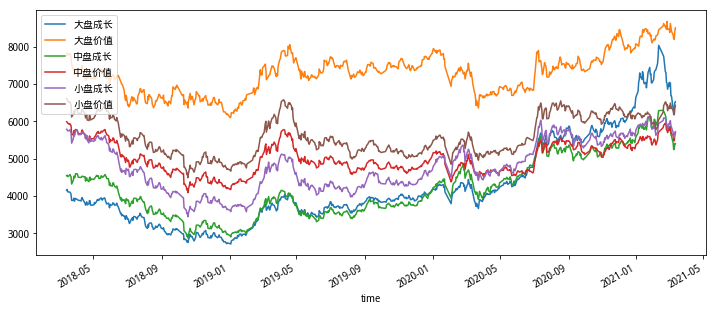

In [23]:
df2.plot(figsize=(12,5))
pl.legend(loc='upper left')

In [109]:
q=query(finance.FUND_NET_VALUE) \
    .filter(finance.FUND_NET_VALUE.code==code,
        finance.FUND_NET_VALUE.day > datetime.now()-timedelta(days=365*3),
        finance.FUND_NET_VALUE.day < end_date,          
           ) 
df=finance.run_query(q)
df.set_index('day', inplace=True )
df.head()

,id,code,net_value,sum_value,factor,acc_factor,refactor_net_value
day,,,,,,,
2018-03-15,6550791,161005,2.1990,4.8870,1.0,5.397765,11.869685
2018-03-16,6563139,161005,2.1693,4.8573,1.0,5.397765,11.709372
2018-03-19,6586709,161005,2.1830,4.8710,1.0,5.397765,11.783321
2018-03-20,6608437,161005,2.2045,4.8925,1.0,5.397765,11.899373
2018-03-21,6628281,161005,2.1772,4.8652,1.0,5.397765,11.752014


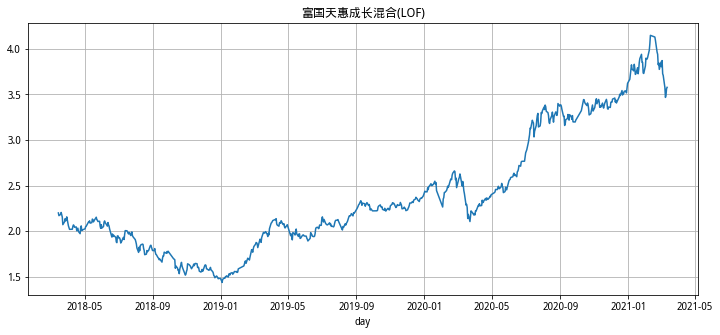

In [112]:
df['net_value'].plot(figsize=(12,5),title=fund_name)
pl.grid()

In [208]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import matplotlib.ticker as ticker
import numpy as np
import random

def max_drawdown(xdate, ycapital):
    
    # 计算每日的回撤
    drawdown = []
    tmp_max_capital = ycapital[0]
    for c in ycapital:
        tmp_max_capital = max(c, tmp_max_capital)
        drawdown.append(1 - c / tmp_max_capital)
    
    # 最大回撤
    MaxDrawdown = max(drawdown)
    # 计算最大回撤日期范围
    endidx = np.argmax(drawdown)
    #enddate = xdate[endidx]
    
    startidx = np.argmax(ycapital[:endidx])
    #startdate = xdate[startidx]
    #仅仅画图的话，我们只要索引值更加方便
    return MaxDrawdown, startidx, endidx
 
def max_drawdown_duration(xdate, ycapital):
    
    duration = []
    tmp_max_capital = ycapital[0]
    for c in ycapital:
        if c >= tmp_max_capital:
            duration.append(0)
        else:
            duration.append(duration[-1]+1)
        tmp_max_capital = max(c, tmp_max_capital)
 
    MaxDDD = max(duration)
    
    #fig, ax = plt.subplots(figsize = (21, 9)) 
    #plt.plot(xdate, duration)
    #ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
    endidx = np.argmax(duration)
    startidx = endidx - MaxDDD
    
    return MaxDDD, startidx, endidx
 
def max_drawdown_restore_time(startidx, endidx, xdate, ycapital):
    """
    startidx:表示最大回撤的开始时间在 xdate 中的索引，由 max_drawdown 方法返回
    endidx:表示最大回撤的结束时间在 xdate 中的索引，由 max_drawdown 方法返回
    """
    maxdd_resore_time = 0
    restore_endidx = np.inf
    for t in range(endidx, len(xdate)):
        if ycapital[t] >= ycapital[startidx]:
            restore_endidx = t
            break
        else:
            maxdd_resore_time += 1
    
    restore_endidx = min(restore_endidx, len(xdate)-1)
    return maxdd_resore_time, restore_endidx
    
def plot(title, xdate, ycapital):
    # 指定画布大小
    fig, ax = plt.subplots(figsize = (21, 9))  
    # 绘图并设置颜色，图例标签，线宽
    plt.plot(xdate, ycapital, 'red', label = title, linewidth = 2)
    
    # 绘制最大回撤日期范围标识 marker = 'v'
    MaxDrawdown, startidx, endidx = max_drawdown(xdate, ycapital)
    print(f'最大回撤为：{round(MaxDrawdown*100,2)}%')
    plt.scatter([xdate[startidx], xdate[endidx]], [ycapital[startidx], ycapital[endidx]],
                s = 100, c = 'b', marker = 's', label = '最大回撤开始时间')
   

    # 竖线
    #plt.axvline(x= xdate[startidx], color = 'r')    
    # 绘制最大回撤恢复时间
    maxdd_resore_time, restore_endidx = max_drawdown_restore_time(startidx, endidx, xdate, ycapital)
    print("最大回撤恢复时间为（天）：", maxdd_resore_time)
    plt.scatter([xdate[endidx], xdate[restore_endidx]], [ycapital[endidx], ycapital[restore_endidx]],
                s = 100, c = 'cyan', marker = 'D', label = '最大回撤恢复时间')
    # 加背景
    plt.fill_between(xdate[endidx:restore_endidx], min(ycapital), max(ycapital), facecolor='red', alpha=0.3)
    
    # 绘制最大回撤持续期标识 marker = 'D'
    MaxDDD, startidx, endidx = max_drawdown_duration(xdate, ycapital)
    plt.scatter([xdate[startidx], xdate[endidx]], [ycapital[startidx], ycapital[endidx]],
                s = 80, c = 'g', marker = 'v', label = '最大回撤结束时间')
    print("最大回撤持续期为（天）：", MaxDDD)
    # 加背景
    plt.fill_between(xdate[startidx:endidx], min(ycapital), max(ycapital), facecolor='green', alpha=0.3)
         
    # 设置刻度值颜色
    plt.yticks(color = 'gray')
    # 设置 y 轴百分比显示，注意将 y 轴数据乘以 100
    #ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f%%'))
    # 颜色，旋转刻度
    plt.xticks(color = 'gray',rotation = 15)
    # 指定字体，大小，颜色 
    #fontdict = {"family":"宋体", 'size':12, 'color':'gray'} #Times New Roman, Arial
    plt.title(title)
    plt.xlabel('时间')
    plt.ylabel("值")
    # 去掉边框 top left right bottom
    ax.spines['top'].set_visible(False) 
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # 设置 x 轴颜色
    ax.spines['bottom'].set_color('lightgray')
    #设置时间标签显示格式
    ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))
    #设置时间刻度间隔
    #timedelta = (xdate[-1] - xdate[0]) / 10  # 这种方式不能保证显示最后一个日期
    #plt.xticks(mdate.drange(xdate[0], xdate[-1], timedelta))
    # 分成 10 份
    delta = round(len(xdate) / 9)
    plt.xticks([xdate[i*delta] for i in range(9)] + [xdate[-1]])
    #通过修改tick_spacing的值可以修改x轴的密度
    #ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    # 去掉 y 轴刻度线,四个方向均可设置
    plt.tick_params(left = False)
    # 设置刻度的朝向，宽，长度
    plt.tick_params(which = 'major', direction = 'out', width = 0.2, length = 5) # in, out or inout
    # 设置刻度显示在哪个方向上
    #tick_params(labeltop='on',labelbottom='off',labelleft='off',labelright='off')
    # 设置 y 轴方向的网络线
    plt.grid(axis = 'y', color = 'lightgray', linestyle = '-', linewidth = 0.5)
    
    # 设置图例 列宽：columnspacing=float (upper left) 
    plt.legend(loc = 'best', fontsize = 12, frameon=False, ncol = 1)
    # 设置图例字体颜色
    #leg = 上一行 plt.legend 的返回值
    #for line,text in zip(leg.legendHandles, leg.get_texts()): 
    #    text.set_color(line.get_color())
    
    fig.show()
    # fig.savefig("test.png")  # dpi = 150

In [209]:
xdate = df.index.tolist()
ycapital = df['net_value'].values.tolist()
print(xdate[:10], ycapital[:10])

[datetime.date(2018, 3, 15), datetime.date(2018, 3, 16), datetime.date(2018, 3, 19), datetime.date(2018, 3, 20), datetime.date(2018, 3, 21), datetime.date(2018, 3, 22), datetime.date(2018, 3, 23), datetime.date(2018, 3, 26), datetime.date(2018, 3, 27), datetime.date(2018, 3, 28)] [2.199, 2.1693, 2.183, 2.2045, 2.1772, 2.1532, 2.0704, 2.1016, 2.1354, 2.1125]


最大回撤为：34.86%
最大回撤恢复时间为（天）： 162
最大回撤持续期为（天）： 357


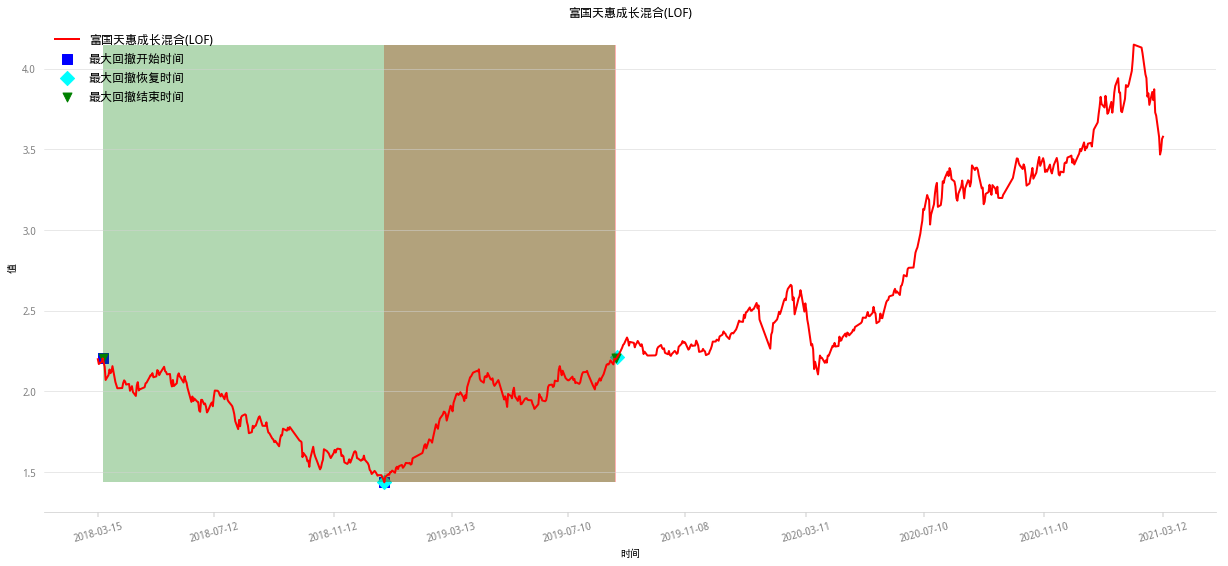

In [210]:
plot(fund_name, xdate,ycapital)

In [99]:
df_new=df['net_value']/df['net_value'].iloc[0]
df_new.head()

day
2018-03-15    1.000000
2018-03-16    0.986494
2018-03-19    0.992724
2018-03-20    1.002501
2018-03-21    0.990086
Name: net_value, dtype: float64

In [101]:
# 累计收益
total_ret=df_new.iloc[-1]-1
total_ret

0.6271487039563439

In [102]:
#计算序列累计最大值
p_d=((df['net_value'].cummax()-df['net_value'])/df['net_value'].cummax()).max()
print(f'pandas方法计算结果：{round(p_d*100,2)}%')    

pandas方法计算结果：34.86%


In [105]:
# 年化收益
annual_ret=pow(1+total_ret,250/len(df_new))-1
annual_ret

0.18115675821589683

In [110]:
def max_drawdown(df):
    md=((df.cummax()-df)/df.cummax()).max()
    return round(md,4)

In [111]:
# 最大回撤
max_drawdown(df['net_value'])

0.3486

In [54]:
df.rename(columns={'day':'time', 'net_value':fund_name}, inplace=True) 

In [26]:
df3 = pd.concat([df2,df[fund_name]],axis=1).fillna(method='pad',axis=0)
df3.head()

,大盘成长,大盘价值,中盘成长,中盘价值,小盘成长,小盘价值,富国天惠成长混合(LOF)
time,,,,,,,
2018-03-14,4150.25,7786.67,4543.48,5988.55,5788.77,6611.67,NaN
2018-03-15,4173.40,7833.86,4556.21,5977.18,5770.86,6579.55,2.1990
2018-03-16,4109.44,7771.86,4517.10,5953.52,5743.06,6552.00,2.1693
2018-03-19,4105.58,7807.09,4548.50,5917.96,5754.16,6507.90,2.1830
2018-03-20,4101.73,7822.24,4572.77,5933.38,5775.06,6515.73,2.2045


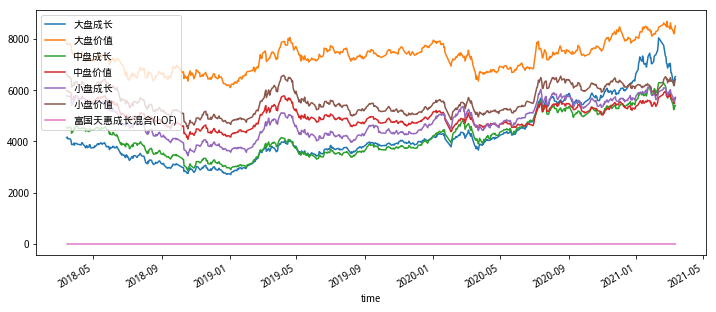

In [27]:
df3.plot(figsize=(12,5))
pl.legend(loc='upper left')

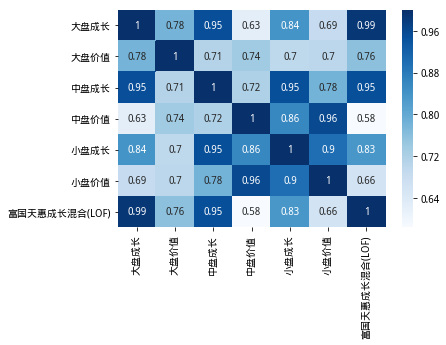

In [28]:
import numpy as np
import seaborn as sns
corr = df3.corr()
sns.heatmap(corr, cmap='Blues', annot=True)

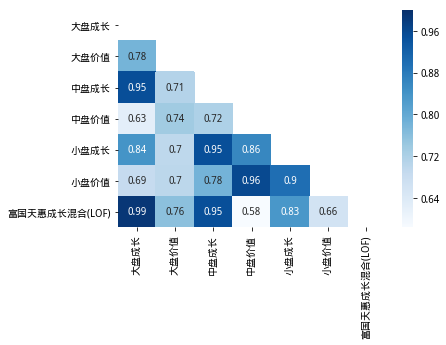

In [29]:
mask = np.zeros_like(corr)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(corr, cmap='Blues', annot=True, mask=mask.T)

In [30]:
from sqlalchemy import func
df=finance.run_query(
    query(finance.SW1_DAILY_VALUATION.date,
          finance.SW1_DAILY_VALUATION.name,
          finance.SW1_DAILY_VALUATION.pe,
          finance.SW1_DAILY_VALUATION.pb,
         )
    .filter(
        finance.SW1_DAILY_VALUATION.date > datetime.now()-timedelta(days=365*3),
        finance.SW1_DAILY_VALUATION.date < end_date,
        func.dayofweek(finance.SW1_DAILY_VALUATION.date) == 2, # 星期一
    )
)
df.head()

,date,name,pe,pb
0,2018-03-19,纺织服装,26.02,2.27
1,2018-03-19,建筑装饰,15.53,1.60
2,2018-03-19,医药生物,38.45,4.10
3,2018-03-19,家用电器,21.69,4.13
4,2018-03-19,电子,39.52,3.84


In [31]:
df2=df.groupby(['date','name'])['pe'].sum().unstack().fillna(method='pad',axis=0)

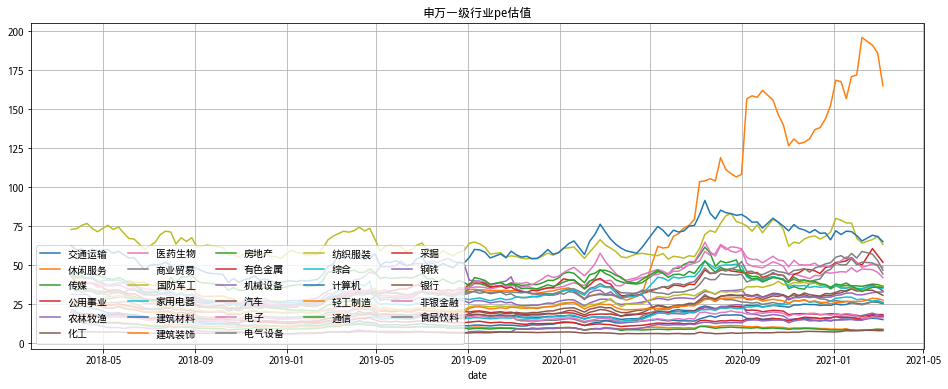

In [32]:
df2.plot(figsize=(16,6),title='申万一级行业pe估值')
pl.legend(loc='lower left',ncol= 5)
pl.grid()

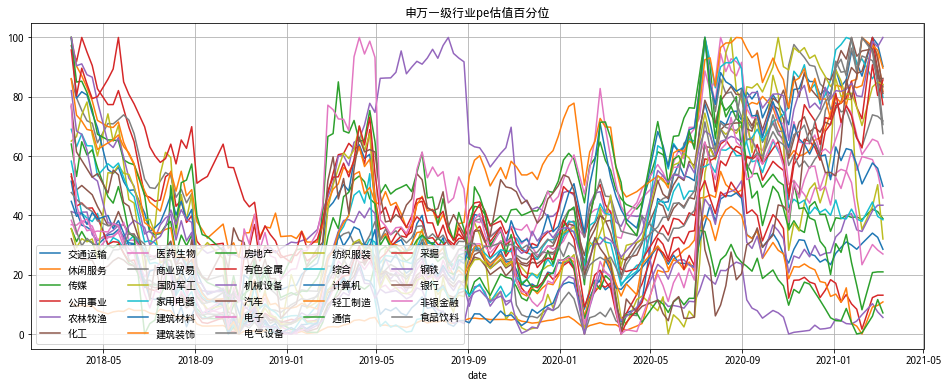

In [33]:
df3 = (df2 - df2.min()) / (df2.max() - df2.min()) * 100
df3.plot(figsize=(16,6),title='申万一级行业pe估值百分位')
pl.legend(loc='lower left',ncol= 5)
pl.grid()

In [34]:
df4 = df3.iloc [[-1]].stack()
df4[df4<25]

date        name
2021-03-08  公用事业    13.078471
            农林牧渔     5.562644
            建筑装饰    10.817942
            房地产      7.103825
            通信      20.942164
dtype: float64

In [35]:
less25_col = list(map(lambda x: x[1], df4[df4<25].to_dict().keys()))
df2=df[df['name'].isin(less25_col)].groupby(['date','name'])['pe'].sum().unstack().fillna(method='pad',axis=0)

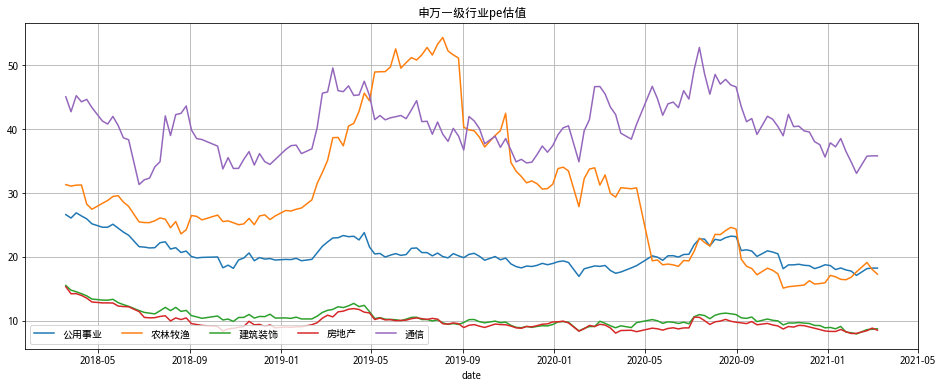

In [36]:
df2.plot(figsize=(16,6),title='申万一级行业pe估值')
pl.legend(loc='lower left',ncol= 5)
pl.grid()

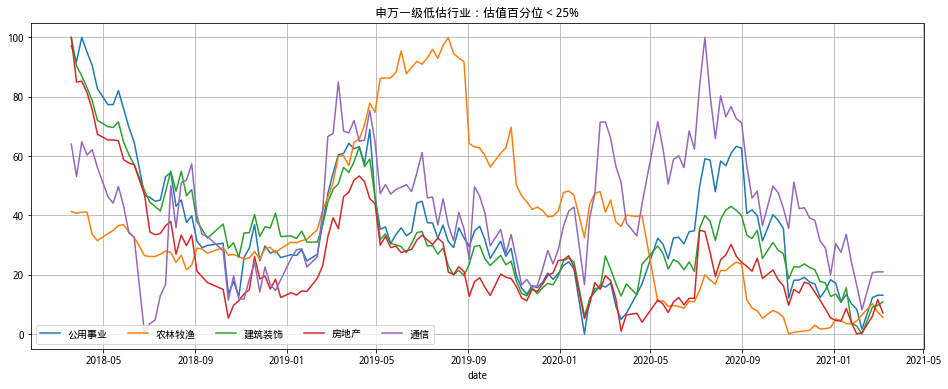

In [37]:
df3 = (df2 - df2.min()) / (df2.max() - df2.min()) * 100
df3.plot(figsize=(16,6),title='申万一级低估行业：估值百分位 < 25%')
pl.legend(loc='lower left',ncol= 5)
pl.grid()

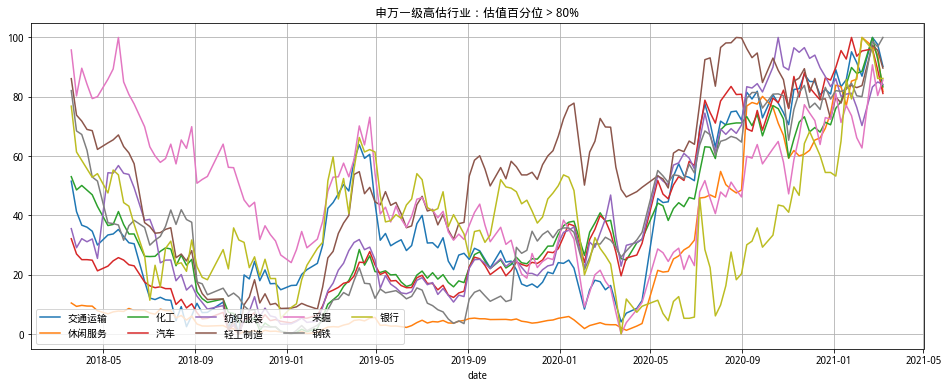

In [38]:
gre80_col = list(map(lambda x: x[1], df4[df4>80].to_dict().keys()))
df2=df[df['name'].isin(gre80_col)].groupby(['date','name'])['pe'].sum().unstack().fillna(method='pad',axis=0)
df3 = (df2 - df2.min()) / (df2.max() - df2.min()) * 100
df3.plot(figsize=(16,6),title='申万一级高估行业：估值百分位 > 80%')
pl.legend(loc='lower left',ncol= 5)
pl.grid()